In [1]:
# load Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import keras
from keras import metrics
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, Dense, GRU, LSTM, Bidirectional
from keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mortgage_preprocessed.csv to mortgage_preprocessed.csv
User uploaded file "mortgage_preprocessed.csv" with length 1165671 bytes


In [3]:
#  Load the data
mortgage = pd.read_csv('mortgage_preprocessed.csv')
mortgage.head()

,first_ob_time,maturity_time,investor,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,status_time,LTV_time_mean,LTV_time_std,balance_mean,balance_std,interest_rate_time_mean,interest_rate_time_std,hpi_time_mean,gdp_time_mean,uer_time_mean,RE_Type.CO,RE_Type.OTH,RE_Type.PU,RE_Type.SF
0,0.305085,0.540284,0,0.3300,0.448551,0,0,0.441826,0.058733,0.020071,1,0.191608,0,0.776633,0.769017,0.287224,0,0,1,0
1,0.305085,0.554502,0,0.4825,0.300699,1,1,0.378820,0.122859,0.008219,1,0.134266,0,0.617981,0.524586,0.586368,0,1,0,0
2,0.389831,0.582938,0,0.2200,0.198801,0,0,0.340868,0.006176,0.036468,1,0.236364,0,0.989504,0.692328,0.168588,0,0,0,1
3,0.372881,0.582938,0,0.5725,0.198801,0,0,0.340373,0.014525,0.033453,1,0.113315,0,0.956620,0.643239,0.161563,0,1,0,0
4,0.372881,0.582938,0,0.1875,0.169830,0,0,0.325279,0.010751,0.020880,1,0.193706,0,0.980528,0.727914,0.187320,0,1,0,0


In [4]:
# Defining independent & dependent variables

y = mortgage['status_time']
X = mortgage.drop('status_time',axis=1)

In [5]:
# Handle Class Imbalance by SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [6]:
# Create train and test set(For SMOTE)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=210)

In [7]:
# Defining a keras sequential model

dl_model = Sequential()
dl_model.add(Dense(100, activation='relu', name = 'Hidden_Layer_1'))
dl_model.add(Dense(64, activation='relu', name = 'Hidden_Layer_2'))
dl_model.add(Dense(48, activation='relu', name = 'Hidden_Layer_3'))
dl_model.add(Dense(36, activation='relu', name = 'Hidden_Layer_4'))
dl_model.add(Dense(20, activation='relu', name = 'Hidden_Layer_5'))
dl_model.add(Dense(10, activation='relu', name = 'Hidden_Layer_6'))
dl_model.add(Dense(1, activation='sigmoid', name = 'Output_Layer'))

In [8]:
# Compile the keras model
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Fit the model

dl_model_fit = dl_model.fit(X_train, y_train, epochs=36, batch_size=32, validation_split = 0.1)

Epoch 1/36
266/266 [==============================] - 1s 2ms/step - loss: 0.6036 - accuracy: 0.6689 - val_loss: 0.6126 - val_accuracy: 0.6702
Epoch 2/36
266/266 [==============================] - 1s 2ms/step - loss: 0.5404 - accuracy: 0.7255 - val_loss: 0.5444 - val_accuracy: 0.7347
Epoch 3/36
266/266 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.7407 - val_loss: 0.5460 - val_accuracy: 0.7336
Epoch 4/36
266/266 [==============================] - 1s 2ms/step - loss: 0.5063 - accuracy: 0.7521 - val_loss: 0.5286 - val_accuracy: 0.7421
Epoch 5/36
266/266 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7543 - val_loss: 0.5817 - val_accuracy: 0.7146
Epoch 6/36
266/266 [==============================] - 1s 2ms/step - loss: 0.4917 - accuracy: 0.7623 - val_loss: 0.5312 - val_accuracy: 0.7273
Epoch 7/36
266/266 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7636 - val_loss: 0.5154 - val_accuracy: 0.7526
Epoch 

In [10]:
# Train Accuracy

dl_model.evaluate(X_train, y_train)

296/296 [==============================] - 0s 966us/step - loss: 0.3948 - accuracy: 0.8242


[0.394826203584671, 0.8241642117500305]

In [11]:
# Test Accuracy

dl_model.evaluate(X_test, y_test)

74/74 [==============================] - 0s 1ms/step - loss: 0.4414 - accuracy: 0.8020


[0.44143104553222656, 0.8020304441452026]

In [12]:
# Training information

history_dict = dl_model_fit.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

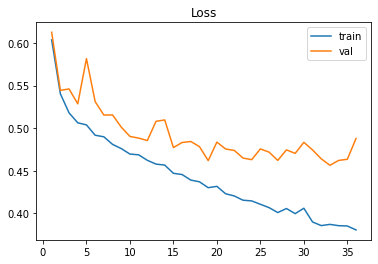

In [13]:
# Training information for loss

epochs = range(1, len(history_dict['loss']) + 1)
plt.title('Loss')
plt.plot(epochs, history_dict['loss'], label='train')
plt.plot(epochs, history_dict['val_loss'], label='val')
plt.legend()
plt.show();

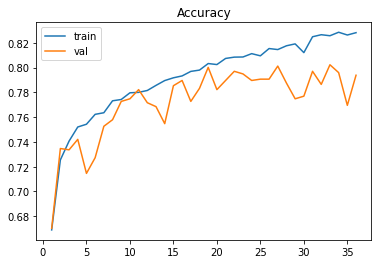

In [14]:
# Training information for accuracy

plt.title('Accuracy')
plt.plot(epochs, history_dict['accuracy'], label='train')
plt.plot(epochs, history_dict['val_accuracy'], label='val')
plt.legend()
plt.show();

In [15]:
# Summarize the model

dl_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 100)               2000      
                                                                 
 Hidden_Layer_2 (Dense)      (None, 64)                6464      
                                                                 
 Hidden_Layer_3 (Dense)      (None, 48)                3120      
                                                                 
 Hidden_Layer_4 (Dense)      (None, 36)                1764      
                                                                 
 Hidden_Layer_5 (Dense)      (None, 20)                740       
                                                                 
 Hidden_Layer_6 (Dense)      (None, 10)                210       
                                                                 
 Output_Layer (Dense)        (None, 1)                 1

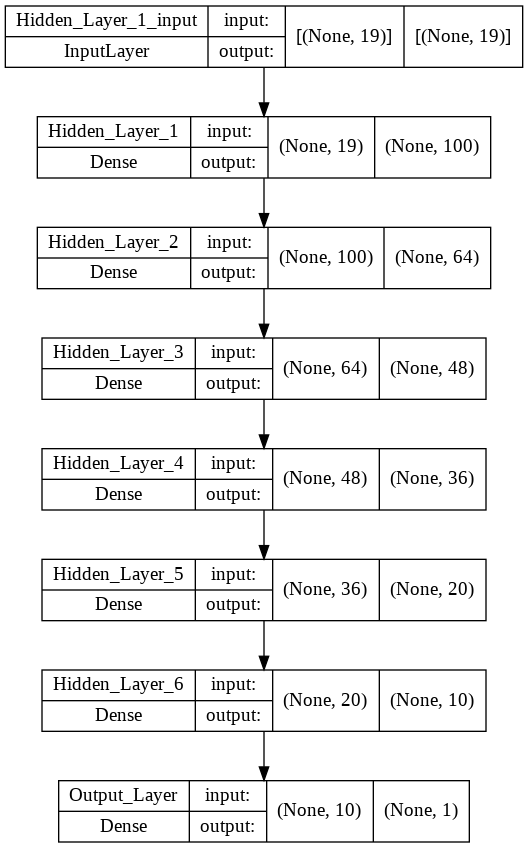

In [16]:
# Visualize the model

plot_model(dl_model, show_shapes=True, show_layer_names=True)

In [17]:
# Calculating kappa value

def get_kappa_binary(actual_y, pred_y):
    cm = confusion_matrix(actual_y, pred_y)
    total = sum(sum(cm))
    p_expected_c0 = ((cm[0,0]+cm[0,1])/total) * ((cm[0,0]+cm[1,0])/total)
    p_expected_c1 = ((cm[1,1]+cm[1,0])/total) * ((cm[1,1]+cm[0,1])/total)
    p_expected = p_expected_c0 + p_expected_c1
    p_actual = (cm[0,0]+cm[1,1])/total
    kappa = (p_actual - p_expected)/(1 - p_expected)
    return kappa

In [49]:
# Calculating Accuracy, Sensitivity and Specificity

def get_performance_binary(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    return accuracy, sensitivity, specificity

In [19]:
# Make predictions for train set

train_predictions = (dl_model.predict(X_train) > 0.5).astype("int32")

# Check confusion matrix for train set

print(confusion_matrix(y_train, train_predictions))

[[3539 1175]
 [ 487 4251]]


In [20]:
# Get kappa for train set

get_kappa_binary(y_train,train_predictions)

0.6481960861527261

In [50]:
# Get sensitivity and specificity for train set

get_performance_binary(y_train, train_predictions)

(0.8241641980533221, 0.8972140143520473, 0.75074246924056)

In [24]:
# Class-level Performance for train set

print(classification_report(y_train, train_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.8790    0.7507    0.8098      4714
           1     0.7835    0.8972    0.8365      4738

    accuracy                         0.8242      9452
   macro avg     0.8312    0.8240    0.8232      9452
weighted avg     0.8311    0.8242    0.8232      9452



In [25]:
# Make predictions for test set

test_predictions = (dl_model.predict(X_test) > 0.5).astype("int32")

# Get Confusion Matrix for test set

print(confusion_matrix(y_test, test_predictions))

[[ 876  318]
 [ 150 1020]]


In [26]:
# Get kappa for test set

get_kappa_binary(y_test,test_predictions)

0.6045907207740407

In [51]:
# Get sensitivity and specificity for test set

get_performance_binary(y_test, test_predictions)

(0.8020304568527918, 0.8717948717948718, 0.7336683417085427)

In [28]:
# Class-level Performance for test set

print(classification_report(y_test, test_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.8538    0.7337    0.7892      1194
           1     0.7623    0.8718    0.8134      1170

    accuracy                         0.8020      2364
   macro avg     0.8081    0.8027    0.8013      2364
weighted avg     0.8085    0.8020    0.8012      2364



In [29]:
pip install -q -U keras-tuner

     |████████████████████████████████| 135 kB 14.8 MB/s 
     |████████████████████████████████| 1.6 MB 79.2 MB/s 


In [30]:
import keras_tuner as kt

In [31]:
# Define the sequential model

def model_builder(hp):
  model = keras.Sequential()
  # Tune the number of units in the first Dense layer
  # Choose an optimal value 
  hp_units1 = hp.Int('units_1', min_value = 16, 
                     max_value = 200, 
                     step = 16)
  hp_units2 = hp.Int('units_2', min_value = 16, 
                     max_value = 160, 
                     step = 16)
  hp_units3 = hp.Int('units_3', min_value = 16, 
                     max_value = 160, 
                     step = 16)
  hp_units4 = hp.Int('units_4', min_value = 16, 
                     max_value = 80, 
                     step = 16)
  hp_units5 = hp.Int('units_5', min_value = 16, 
                     max_value = 80, 
                     step = 16)
  hp_units6 = hp.Int('units_6', min_value = 16, 
                     max_value = 80, 
                     step = 16)
  hp_units7 = hp.Int('units_7', min_value = 16, 
                     max_value = 80, 
                     step = 16)
  hp_units8 = hp.Int('units_8', min_value = 16, 
                     max_value = 32, 
                     step = 8)
  hp_units9 = hp.Int('units_9', min_value = 8, 
                     max_value = 32, 
                     step = 4)
  hp_units10 = hp.Int('units_10', min_value = 8, 
                     max_value = 32, 
                     step = 4)
  model.add(Dense(units = hp_units1, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units2, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units3, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units4, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units5, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units6, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units7, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units8, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units9, 
                               activation = 'relu'))
  model.add(Dense(units = hp_units10, 
                               activation = 'relu'))
  model.add(Dense(units = 1,
              activation = 'sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.1 - 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values = [1e-1, 1e-2, 1e-3, 1e-4])

  model.compile(optimizer = Adam(learning_rate = hp_learning_rate),
                loss = 'binary_crossentropy',
                metrics = 'accuracy')

  return model

In [32]:
# Use a variation of the Hyperband approach to optimizing hyperparameters

tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy',
                     max_epochs = 50,
                     factor = 3,
                     seed = 210,
                     directory = 'my_dir',
                     project_name = 'intro_to_kt3')

In [33]:
# Set up a stop early to avoid overfitting and save effectiveness

stop_early = EarlyStopping(monitor = 'val_loss', patience = 5)

In [34]:
# Conduct the hyperparameter search

tuner.search(X_train, 
             y_train, 
             epochs = 50, 
             batch_size = 32, 
             validation_split = 0.1, 
             callbacks = [stop_early])

Trial 90 Complete [00h 00m 34s]
val_accuracy: 0.8002114295959473

Best val_accuracy So Far: 0.8033826351165771
Total elapsed time: 00h 14m 07s


In [35]:
# View the information for the best model

best_mod = tuner.get_best_hyperparameters(num_trials = 1)[0]
best_mod.get_config()

{'space': [{'class_name': 'Int',
   'config': {'name': 'units_1',
    'default': None,
    'conditions': [],
    'min_value': 16,
    'max_value': 200,
    'step': 16,
    'sampling': None}},
  {'class_name': 'Int',
   'config': {'name': 'units_2',
    'default': None,
    'conditions': [],
    'min_value': 16,
    'max_value': 160,
    'step': 16,
    'sampling': None}},
  {'class_name': 'Int',
   'config': {'name': 'units_3',
    'default': None,
    'conditions': [],
    'min_value': 16,
    'max_value': 160,
    'step': 16,
    'sampling': None}},
  {'class_name': 'Int',
   'config': {'name': 'units_4',
    'default': None,
    'conditions': [],
    'min_value': 16,
    'max_value': 80,
    'step': 16,
    'sampling': None}},
  {'class_name': 'Int',
   'config': {'name': 'units_5',
    'default': None,
    'conditions': [],
    'min_value': 16,
    'max_value': 80,
    'step': 16,
    'sampling': None}},
  {'class_name': 'Int',
   'config': {'name': 'units_6',
    'default': None,


In [52]:
# Run the model using our optimal hyperparameters.

model_tune = tuner.hypermodel.build(best_mod)
history_tune = model_tune.fit(X_train, 
                              y_train,
                              epochs = best_mod.get('tuner/epochs'),
                              batch_size = 32,
                              validation_split = 0.1)

Epoch 1/50
266/266 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5379 - val_loss: 0.6844 - val_accuracy: 0.5581
Epoch 2/50
266/266 [==============================] - 1s 3ms/step - loss: 0.6452 - accuracy: 0.6626 - val_loss: 0.6147 - val_accuracy: 0.7378
Epoch 3/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5693 - accuracy: 0.7390 - val_loss: 0.5651 - val_accuracy: 0.7400
Epoch 4/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5305 - accuracy: 0.7434 - val_loss: 0.5456 - val_accuracy: 0.7431
Epoch 5/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5198 - accuracy: 0.7498 - val_loss: 0.5410 - val_accuracy: 0.7431
Epoch 6/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5117 - accuracy: 0.7589 - val_loss: 0.5292 - val_accuracy: 0.7696
Epoch 7/50
266/266 [==============================] - 1s 3ms/step - loss: 0.5013 - accuracy: 0.7621 - val_loss: 0.5218 - val_accuracy: 0.7643
Epoch 

In [53]:
# Train Accuracy

model_tune.evaluate(X_train, y_train)

296/296 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8219


[0.40021270513534546, 0.8219424486160278]

In [54]:
# Test Accuracy

model_tune.evaluate(X_test, y_test)

74/74 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8096


[0.42768800258636475, 0.8096446990966797]

In [39]:
# View the model summary

model_tune.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 112)               2240      
                                                                 
 dense_12 (Dense)            (None, 96)                10848     
                                                                 
 dense_13 (Dense)            (None, 112)               10864     
                                                                 
 dense_14 (Dense)            (None, 32)                3616      
                                                                 
 dense_15 (Dense)            (None, 48)                1584      
                                                                 
 dense_16 (Dense)            (None, 80)                3920      
                                                                 
 dense_17 (Dense)            (None, 64)               

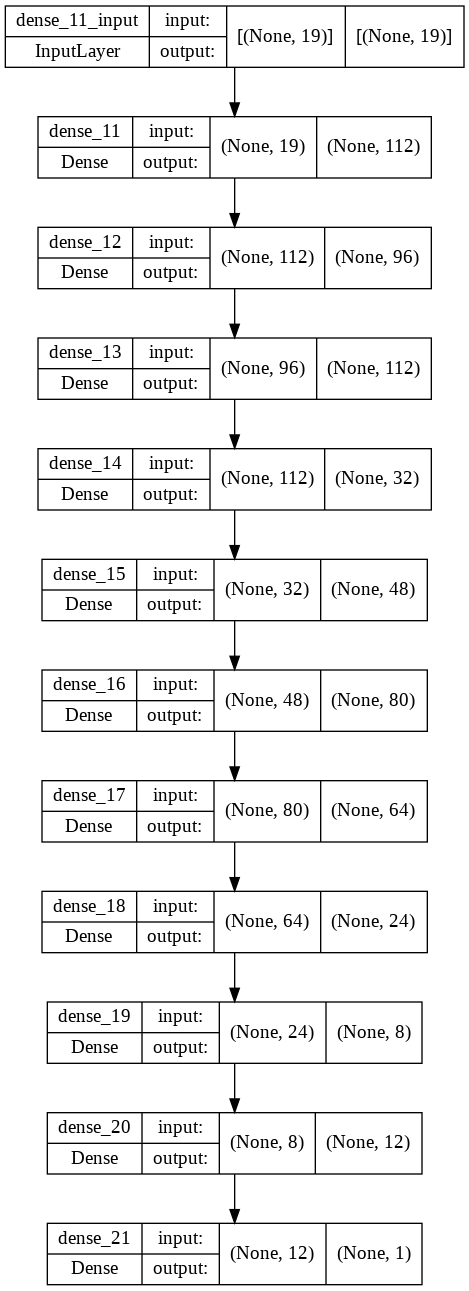

In [40]:
# Visualize the model

plot_model(model_tune, show_shapes=True, show_layer_names=True)

In [41]:
# Make predictions for train set

train_tune_predictions = (model_tune.predict(X_train) > 0.5).astype("int32")

# Check confusion matrix for train set

print(confusion_matrix(y_train, train_tune_predictions))

[[3735  979]
 [ 726 4012]]


In [42]:
# Get kappa value for train dataset

get_kappa_binary(y_train,train_tune_predictions)

0.6391784199604009

In [55]:
# Get sensitivity and specificity for train set

get_performance_binary(y_train, train_tune_predictions)

(0.8196148963182395, 0.8467707893626003, 0.792320746711922)

In [44]:
# Class-level Performance for train set

print(classification_report(y_train, train_tune_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.8373    0.7923    0.8142      4714
           1     0.8038    0.8468    0.8248      4738

    accuracy                         0.8196      9452
   macro avg     0.8206    0.8195    0.8195      9452
weighted avg     0.8205    0.8196    0.8195      9452



In [45]:
# Make predictions for test set

test_tune_predictions = (model_tune.predict(X_test) > 0.5).astype("int32")

# Get Confusion Matrix for test set

print(confusion_matrix(y_test, test_tune_predictions))

[[939 255]
 [202 968]]


In [46]:
# Get kappa value for test dataset

get_kappa_binary(y_test,test_tune_predictions)

0.6135032798708658

In [56]:
# Get sensitivity and specificity for test set

get_performance_binary(y_test, test_tune_predictions)

(0.80668358714044, 0.8273504273504273, 0.7864321608040201)

In [48]:
# Class-level Performance for test set

print(classification_report(y_test, test_tune_predictions, digits = 4))

              precision    recall  f1-score   support

           0     0.8230    0.7864    0.8043      1194
           1     0.7915    0.8274    0.8090      1170

    accuracy                         0.8067      2364
   macro avg     0.8072    0.8069    0.8067      2364
weighted avg     0.8074    0.8067    0.8066      2364

